In [ ]:
import pandas as pd 
import numpy as np

import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.dummy import DummyClassifier
from  sklearn.model_selection import train_test_split
from sklearn.experimental import enable_iterative_imputer
 
from sklearn.impute import SimpleImputer , IterativeImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PowerTransformer , FunctionTransformer , OneHotEncoder , OrdinalEncoder ,MinMaxScaler ,MaxAbsScaler, RobustScaler
from sklearn.compose  import ColumnTransformer
from sklearn.linear_model import LogisticRegression , LinearRegression
from ydata_profiling import ProfileReport
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
# from sklearn.datasets import load_breast_cancer
# from tqdm.notebook import tqdm


c:\Users\arman\miniconda3\envs\ml100-day\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
df = pd.read_csv('csv/heart_disease_uci.csv')
df =  df.drop(['id','dataset','ca'],axis=1)


In [4]:
df_bc

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]], shape=(569, 30)),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,

In [3]:
prof = ProfileReport(df)
prof.to_file(output_file='output.html')

Summarize dataset:   0%|          | 0/18 [00:00<?, ?it/s, Describe variable: chol]

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 36.44it/s]


In [35]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,fixed defect,0
1,67,Male,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,normal,2
2,67,Male,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,reversable defect,1
3,37,Male,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,normal,0
4,41,Female,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,54,Female,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,1
916,62,Male,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,0
917,55,Male,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,fixed defect,2
918,58,Male,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,0


In [36]:
df.isna().mean()*100


age          0.000000
sex          0.000000
cp           0.000000
trestbps     6.413043
chol         3.260870
fbs          9.782609
restecg      0.217391
thalch       5.978261
exang        5.978261
oldpeak      6.739130
slope       33.586957
thal        52.826087
num          0.000000
dtype: float64

In [37]:
df['fbs'] = df['fbs'].astype(bool).astype(int)
df['exang'] = df['exang'].astype(bool).astype(int)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145.0,233.0,1,lv hypertrophy,150.0,0,2.3,downsloping,fixed defect,0
1,67,Male,asymptomatic,160.0,286.0,0,lv hypertrophy,108.0,1,1.5,flat,normal,2
2,67,Male,asymptomatic,120.0,229.0,0,lv hypertrophy,129.0,1,2.6,flat,reversable defect,1
3,37,Male,non-anginal,130.0,250.0,0,normal,187.0,0,3.5,downsloping,normal,0
4,41,Female,atypical angina,130.0,204.0,0,lv hypertrophy,172.0,0,1.4,upsloping,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,54,Female,asymptomatic,127.0,333.0,1,st-t abnormality,154.0,0,0.0,NaN,NaN,1
916,62,Male,typical angina,NaN,139.0,0,st-t abnormality,NaN,1,NaN,NaN,NaN,0
917,55,Male,asymptomatic,122.0,223.0,1,st-t abnormality,100.0,0,0.0,NaN,fixed defect,2
918,58,Male,asymptomatic,NaN,385.0,1,lv hypertrophy,NaN,1,NaN,NaN,NaN,0


In [20]:
nd = df[['age','trestbps','chol','thalch','oldpeak','num']]

In [21]:
nd

,age,trestbps,chol,thalch,oldpeak,num
0,63,145.0,233.0,150.0,2.3,0
1,67,160.0,286.0,108.0,1.5,2
2,67,120.0,229.0,129.0,2.6,1
3,37,130.0,250.0,187.0,3.5,0
4,41,130.0,204.0,172.0,1.4,0
...,...,...,...,...,...,...
915,54,127.0,333.0,154.0,0.0,1
916,62,NaN,139.0,NaN,NaN,0
917,55,122.0,223.0,100.0,0.0,2
918,58,NaN,385.0,NaN,NaN,0


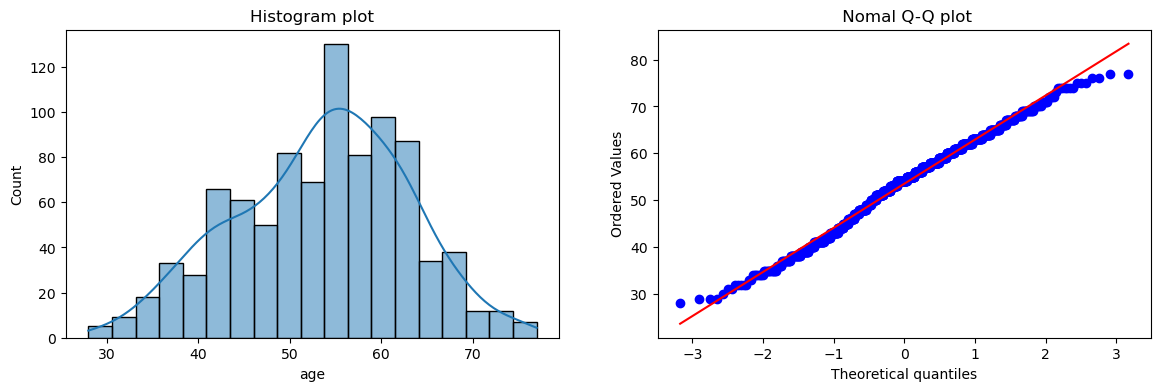

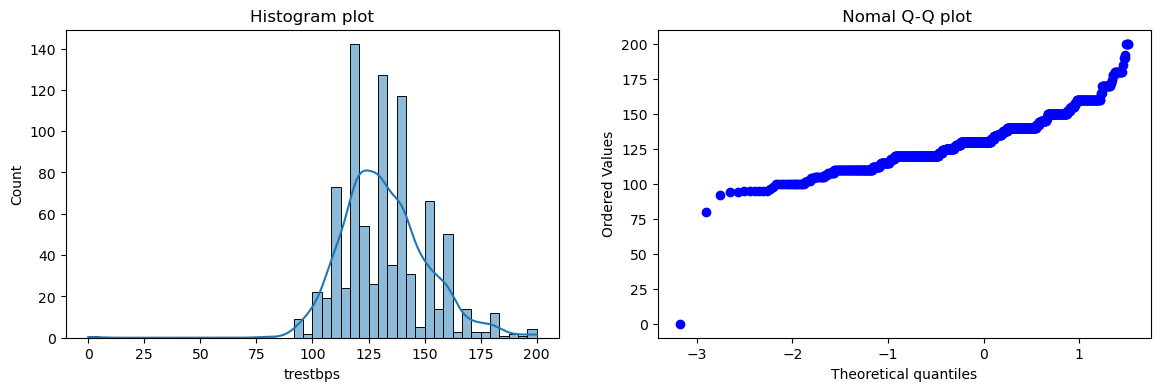

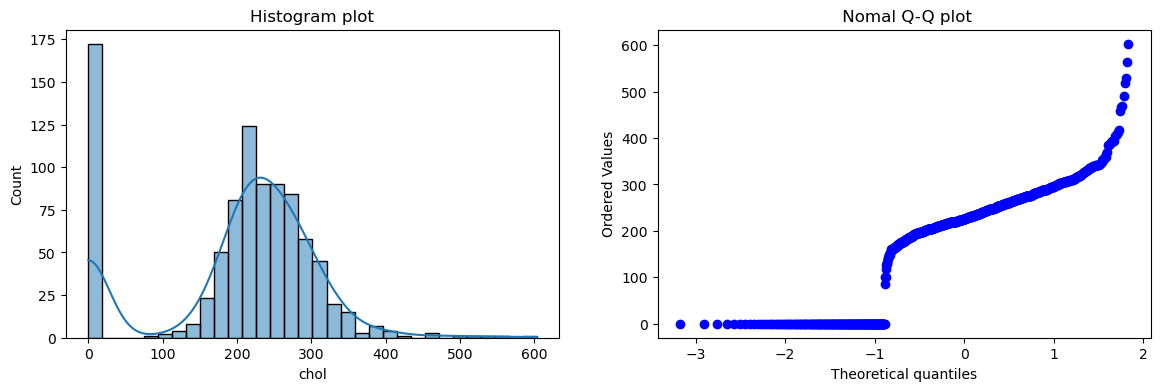

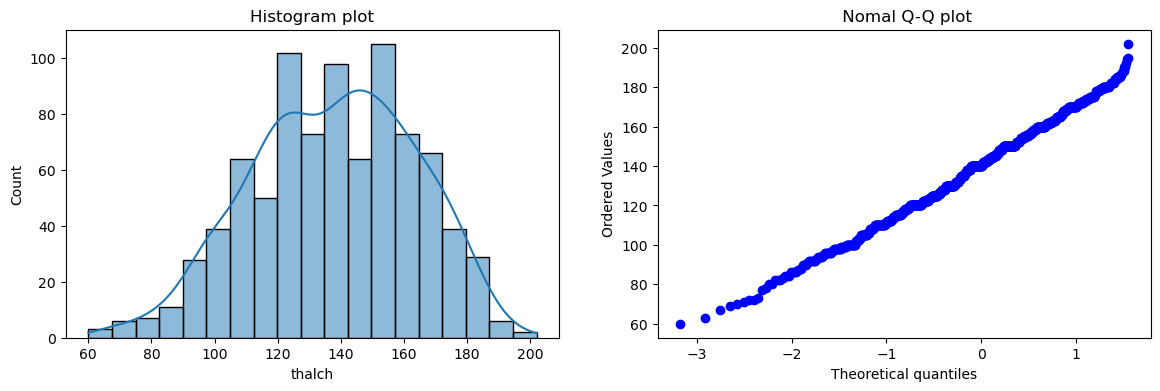

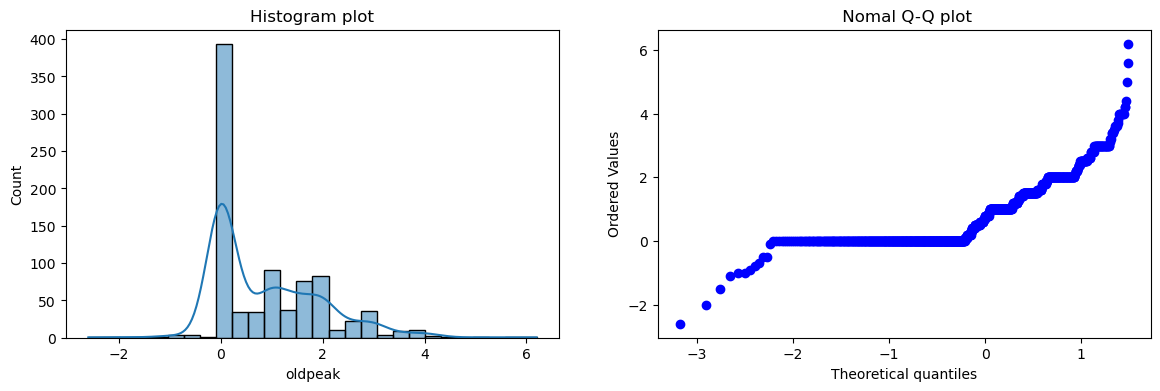

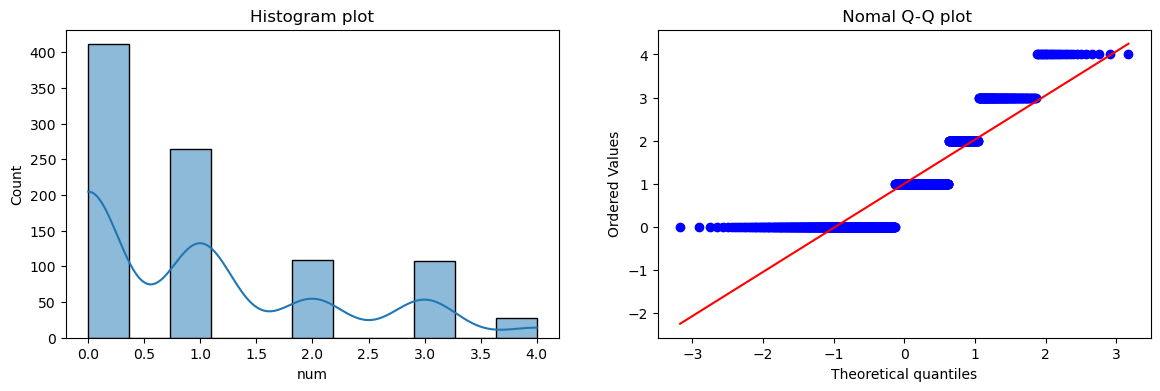

In [22]:
for cols in nd.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.histplot(nd[cols],kde=True)
    plt.title('Histogram plot')
    
    plt.subplot(122)
    stats.probplot(nd[cols] , dist='norm', plot=plt)
    plt.title(' Nomal Q-Q plot')
    
    plt.show()

In [38]:
x = df.drop('num',axis=1)
y = df['num']

In [39]:
x_train , x_test , y_train , y_test = train_test_split(x, y , test_size=0.2, random_state=42)

In [40]:
y_train

880    4
457    0
797    3
25     0
84     0
      ..
106    2
270    1
860    0
435    0
102    0
Name: num, Length: 736, dtype: int64

In [41]:
dm = DummyClassifier(strategy='most_frequent')
dm.fit(x_train,y_train)
y_pred = dm.score(x_test,y_test)
print('BaseLine : ',y_pred)


BaseLine :  0.4076086956521739


In [42]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145.0,233.0,1,lv hypertrophy,150.0,0,2.3,downsloping,fixed defect,0
1,67,Male,asymptomatic,160.0,286.0,0,lv hypertrophy,108.0,1,1.5,flat,normal,2
2,67,Male,asymptomatic,120.0,229.0,0,lv hypertrophy,129.0,1,2.6,flat,reversable defect,1
3,37,Male,non-anginal,130.0,250.0,0,normal,187.0,0,3.5,downsloping,normal,0
4,41,Female,atypical angina,130.0,204.0,0,lv hypertrophy,172.0,0,1.4,upsloping,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,54,Female,asymptomatic,127.0,333.0,1,st-t abnormality,154.0,0,0.0,NaN,NaN,1
916,62,Male,typical angina,NaN,139.0,0,st-t abnormality,NaN,1,NaN,NaN,NaN,0
917,55,Male,asymptomatic,122.0,223.0,1,st-t abnormality,100.0,0,0.0,NaN,fixed defect,2
918,58,Male,asymptomatic,NaN,385.0,1,lv hypertrophy,NaN,1,NaN,NaN,NaN,0


In [43]:
cat_data = ['sex','restecg','thal']
cat_o_data = ['cp','slope']
num_data = ['age','trestbps','chol','fbs','thalch','exang','oldpeak']
eod = df['chol'].mean() + 3 * df['chol'].std()
eod

np.float64(531.472768138343)

In [44]:
cp_order = [
    'Missing',
    'non-anginal',
    'atypical angina',
    'typical angina',
    'asymptomatic'
    ]

slope_order = [
    'Missing',
    'upsloping',
    'flat',
    'downsloping'
    ]

In [45]:
cat_pipe =Pipeline([
    ('Missing_C',SimpleImputer(strategy='constant',fill_value='Missing')),#,add_indicator=True
    ('OHE_Encoding',OneHotEncoder(drop='first',sparse_output=False,handle_unknown='ignore')),
    ('scalling',MinMaxScaler())
    
]) 

In [46]:
cat_o_pipe = Pipeline([
    ('Missing_oe',SimpleImputer(strategy='constant',fill_value='Missing')),
    ('O_Encoding',OrdinalEncoder(categories=[cp_order,slope_order])),
    ('scalling',MinMaxScaler())
    
])

In [71]:
num_pipe = Pipeline([
    ('Missing_N',SimpleImputer(strategy='constant',add_indicator=True , fill_value=9999999)), # 
    ('Transformer',PowerTransformer()),
    ('scalling',MinMaxScaler())
])

In [72]:
preprocessing = ColumnTransformer(transformers=[
    ('cat_o_data',cat_o_pipe,cat_o_data),
    ('Cat_data',cat_pipe,cat_data),
    ('Num_data',num_pipe,num_data)
])


In [73]:
pipe = Pipeline([
    ('preprocessing',preprocessing),
    ('Model',LogisticRegression())
])

In [74]:
pipe.fit(x_train,y_train)

,steps,"[('preprocessing', ...), ('Model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('cat_o_data', ...), ('Cat_data', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [75]:
y_pred = pipe.predict(x_test)

accuracy_score(y_test,y_pred)


0.592391304347826

In [76]:
X_transformed = pipe.named_steps['preprocessing'].fit_transform(x_train)

In [53]:
feature_names = pipe.named_steps["preprocessing"].get_feature_names_out()

In [54]:
X_transformed_df = pd.DataFrame(X_transformed , columns=feature_names,index=x_train.index)

In [55]:
X_transformed_df

,cat_o_data__cp,cat_o_data__slope,Cat_data__sex_Male,Cat_data__restecg_lv hypertrophy,Cat_data__restecg_normal,Cat_data__restecg_st-t abnormality,Cat_data__thal_fixed defect,Cat_data__thal_normal,Cat_data__thal_reversable defect,Num_data__age,Num_data__trestbps,Num_data__chol,Num_data__fbs,Num_data__thalch,Num_data__exang,Num_data__oldpeak
880,1.000000,0.000000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.666536,0.670930,0.389105,0.0,0.398158,1.0,0.845611
457,0.000000,0.000000,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.497426,0.727755,0.441112,0.0,0.412157,0.0,0.593288
797,0.000000,0.000000,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.435741,0.655081,0.651652,0.0,0.523828,1.0,0.739103
25,0.000000,0.666667,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.415400,0.568847,0.470339,0.0,0.670417,0.0,0.752520
84,0.333333,0.333333,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.456193,0.568847,0.631494,0.0,0.773761,0.0,0.619368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,1.000000,0.333333,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.602358,0.674371,0.401052,0.0,0.699790,1.0,0.593288
270,1.000000,0.333333,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.645045,0.674371,0.450929,0.0,0.525524,1.0,0.774691
860,1.000000,1.000000,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.954392,0.781520,0.609640,1.0,0.342568,1.0,0.781764
435,0.333333,0.666667,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.476755,0.674371,0.465513,0.0,0.554231,1.0,0.781764


In [56]:
for cols in X_transformed_df.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.histplot(X_transformed_df[cols],kde=True)
    plt.title('Histogram plot')
    
    plt.subplot(122)
    stats.probplot(X_transformed_df[cols] , dist='norm', plot=plt)
    plt.title(' Nomal Q-Q plot')
    
    plt.show()

C:\Users\arman\AppData\Local\Temp\ipykernel_13088\3546698712.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(14,4))
C:\Users\arman\AppData\Local\Temp\ipykernel_13088\3546698712.py:11: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()
C:\Users\arman\AppData\Local\Temp\ipykernel_13088\3546698712.py:11: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()
C:\Users\arman\AppData\Local\Temp\ipykernel_13088\3546698712.py:11: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()
C:\Users\arman\AppData\Local\Temp\ipykernel_13088\3546698712.py:11: UserWarning: FigureCanvasAgg is non-interactive, and thus 